In [1]:
import matplotlib.pyplot as plt
from pyspark.mllib.clustering import GaussianMixtureModel

In [2]:
# Load data from S3
lines = sc.textFile(
    name="s3://csed516/largerdatasetspark/wise-colors-15-20-subset1.csv",
    minPartitions=24,
)
parts = lines.map(lambda l: l.split(","))
sources = parts.map(lambda p: (float(p[1]), float(p[2]), float(p[3]), float(p[4])))
sampled_sources = sources.sample(withReplacement=False, fraction=0.25, seed=4)

In [3]:
gmm = GaussianMixtureModel.load(sc, "gmm.model.2.large.data.subset.2")

In [4]:
color_codes = ["g", "y", "m", "b", "r", "k", "c"]
names_and_ansi_codes = {
    "b": [34, "blue"],
    "g": [32, "green"],
    "r": [31, "red"],
    "c": [36, "cyan"],
    "m": [35, "magenta"],
    "y": [33, "yellow"],
    "k": [30, "black"],
}

def print_class_params(_class):
    print("weight: {:.3f}".format(gmm.weights[_class]))
    print("mean: [{:.3f} {:.3f} {:.3f} {:.3f}]".format(*gmm.gaussians[_class].mu))
    cov = gmm.gaussians[_class].sigma.values
    print("covariance matrix: [{:6.3f} {:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[i*4] for i in range(4)]
    ))
    print("                   [{:6.3f} {:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[(i*4)+1] for i in range(4)]
    ))
    print("                   [{:6.3f} {:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[(i*4)+2] for i in range(4)]
    ))
    print("                   [{:6.3f} {:6.3f} {:6.3f} {:6.3f}]".format(
        *[cov[(i*4)+3] for i in range(4)]
    ))
    print("color: \x1b[{}m{}\x1b[0m".format(*names_and_ansi_codes[color_codes[_class]]))

### Class 0

In [5]:
print_class_params(_class=0)

weight: 0.052
mean: [1.215 3.231 3.506 0.290]
covariance matrix: [ 0.380  0.010  0.131 -0.126]
                   [ 0.010  0.656 -0.361 -0.076]
                   [ 0.131 -0.361  0.665 -0.064]
                   [-0.126 -0.076 -0.064  0.295]
color: green


### Class 1

In [6]:
print_class_params(_class=1)

weight: 0.206
mean: [0.899 1.700 2.308 -0.077]
covariance matrix: [ 0.080  0.081 -0.020 -0.001]
                   [ 0.081  0.098 -0.026 -0.000]
                   [-0.020 -0.026  0.617 -0.018]
                   [-0.001 -0.000 -0.018  0.015]
color: yellow


### Class 2

In [7]:
print_class_params(_class=2)

weight: 0.018
mean: [1.611 5.050 1.218 -0.063]
covariance matrix: [ 7.264 -0.807  0.646  0.085]
                   [-0.807  5.748 -0.464  0.228]
                   [ 0.646 -0.464  3.447 -0.496]
                   [ 0.085  0.228 -0.496  0.287]
color: magenta


### Class 3

In [8]:
print_class_params(_class=3)

weight: 0.159
mean: [1.791 3.033 2.418 0.015]
covariance matrix: [ 0.650  0.493  0.012  0.014]
                   [ 0.493  0.610  0.009  0.006]
                   [ 0.012  0.009  1.191  0.016]
                   [ 0.014  0.006  0.016  0.023]
color: blue


### Class 4

In [9]:
print_class_params(_class=4)

weight: 0.189
mean: [1.958 2.606 3.485 0.209]
covariance matrix: [ 0.252  0.166 -0.070 -0.029]
                   [ 0.166  0.203 -0.069 -0.061]
                   [-0.070 -0.069  0.253 -0.012]
                   [-0.029 -0.061 -0.012  0.176]
color: red


### Class 5

In [10]:
print_class_params(_class=5)

weight: 0.176
mean: [2.228 2.711 2.168 0.009]
covariance matrix: [ 0.252  0.191 -0.025  0.043]
                   [ 0.191  0.158 -0.027  0.031]
                   [-0.025 -0.027  0.895 -0.028]
                   [ 0.043  0.031 -0.028  0.021]
color: black


### Class 6

In [11]:
print_class_params(_class=6)

weight: 0.200
mean: [0.872 1.794 3.492 0.235]
covariance matrix: [ 0.073  0.072 -0.009 -0.013]
                   [ 0.072  0.196 -0.039 -0.053]
                   [-0.009 -0.039  0.251 -0.002]
                   [-0.013 -0.053 -0.002  0.217]
color: cyan


In [12]:
classes = gmm.predict(sampled_sources)
colors = classes.map(lambda c: color_codes[c])

x = sampled_sources.map(lambda ss: ss[0])
y = sampled_sources.map(lambda ss: ss[1])
z = sampled_sources.map(lambda ss: ss[2])
w = sampled_sources.map(lambda ss: ss[3])

In [13]:
def plot_2d_scatterplot(x_axis, y_axis):
    figure = plt.figure(figsize=(16,12))
    plt.xlabel(x_axis, fontsize="xx-large")
    plt.ylabel(y_axis, fontsize="xx-large")
    plt.scatter(eval(x_axis).collect(), eval(y_axis).collect(), s=0.125, c=colors.collect())
    plt.show()

### x vs. y

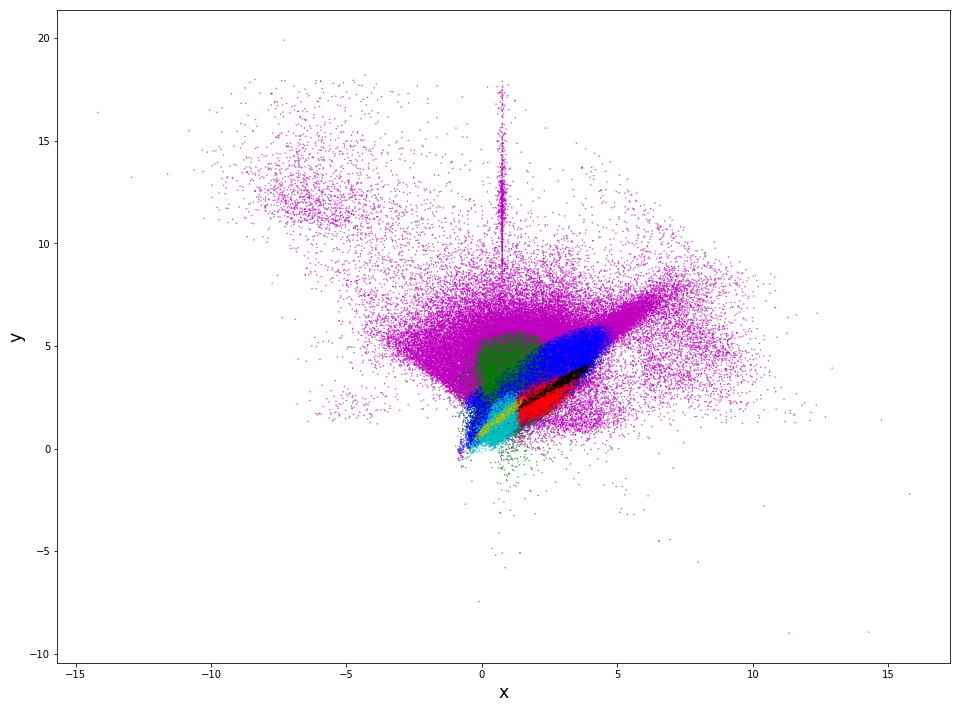

In [14]:
plot_2d_scatterplot(x_axis="x", y_axis="y")

### x vs. z

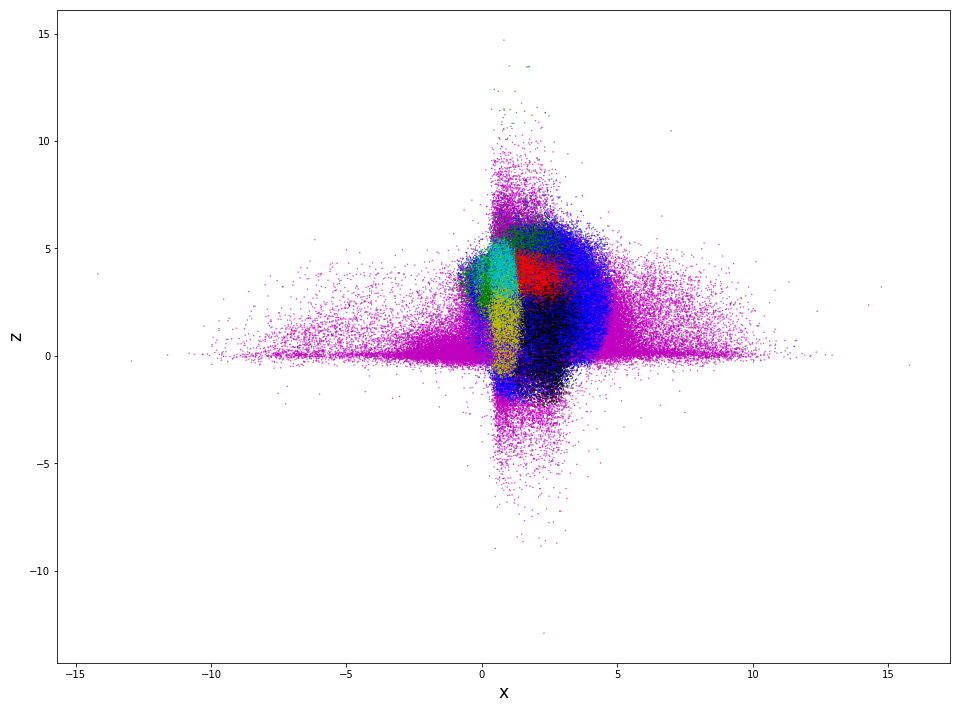

In [15]:
plot_2d_scatterplot(x_axis="x", y_axis="z")

### x vs. w

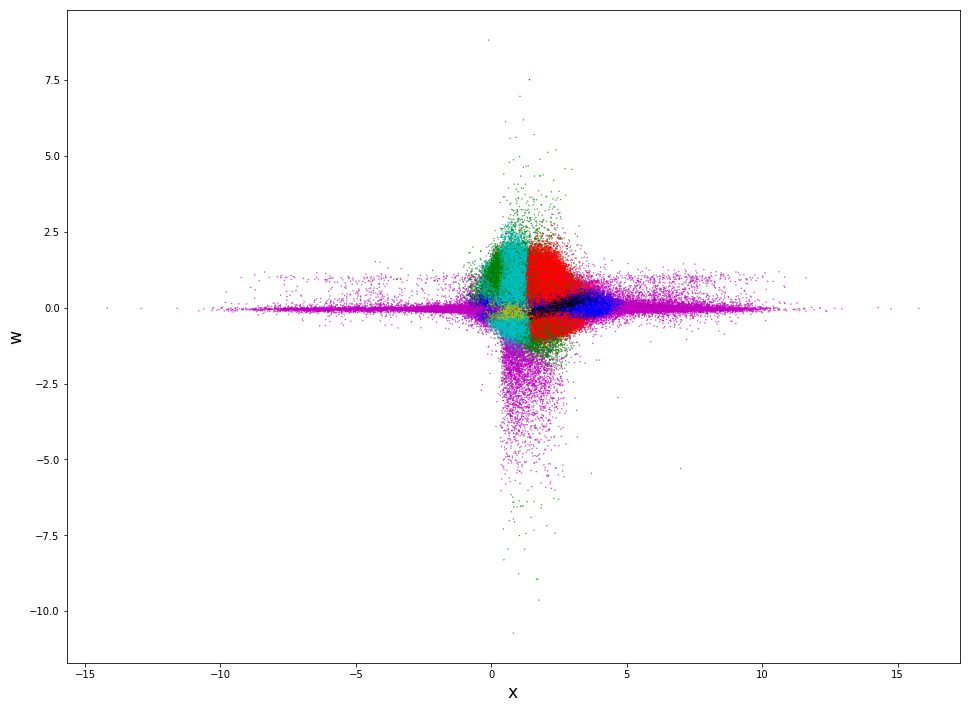

In [16]:
plot_2d_scatterplot(x_axis="x", y_axis="w")

### y vs. z

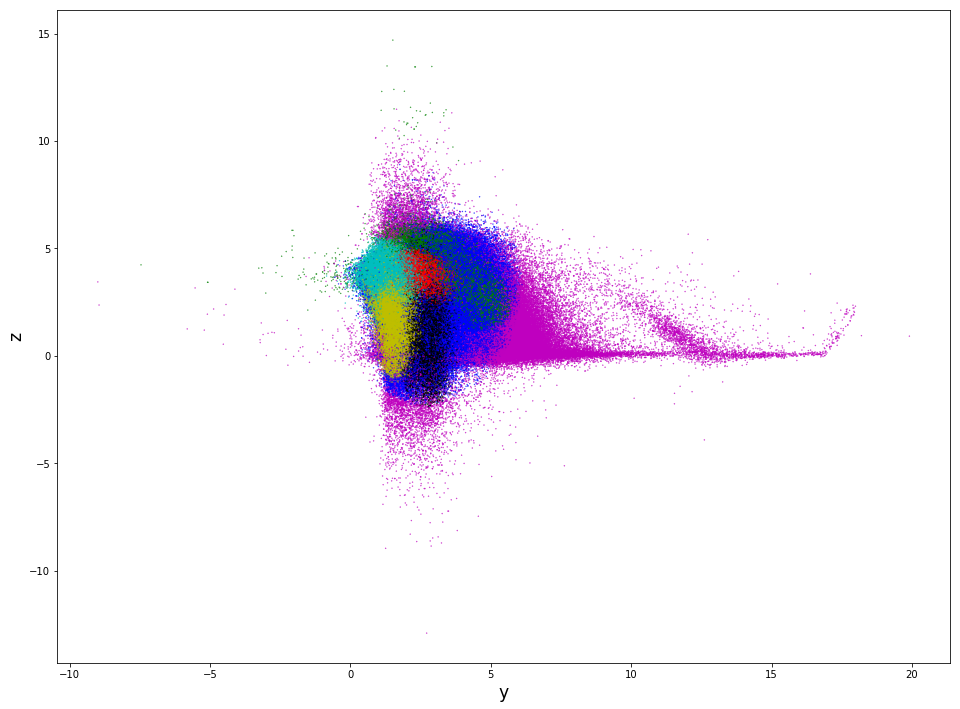

In [17]:
plot_2d_scatterplot(x_axis="y", y_axis="z")

### y vs. w

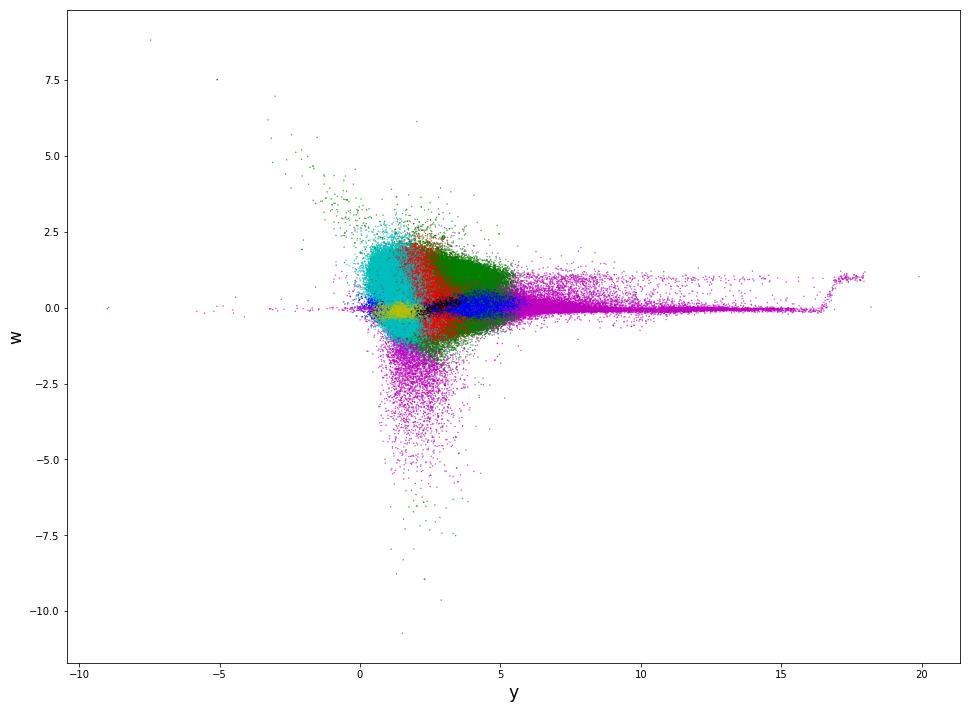

In [18]:
plot_2d_scatterplot(x_axis="y", y_axis="w")

### z vs. w

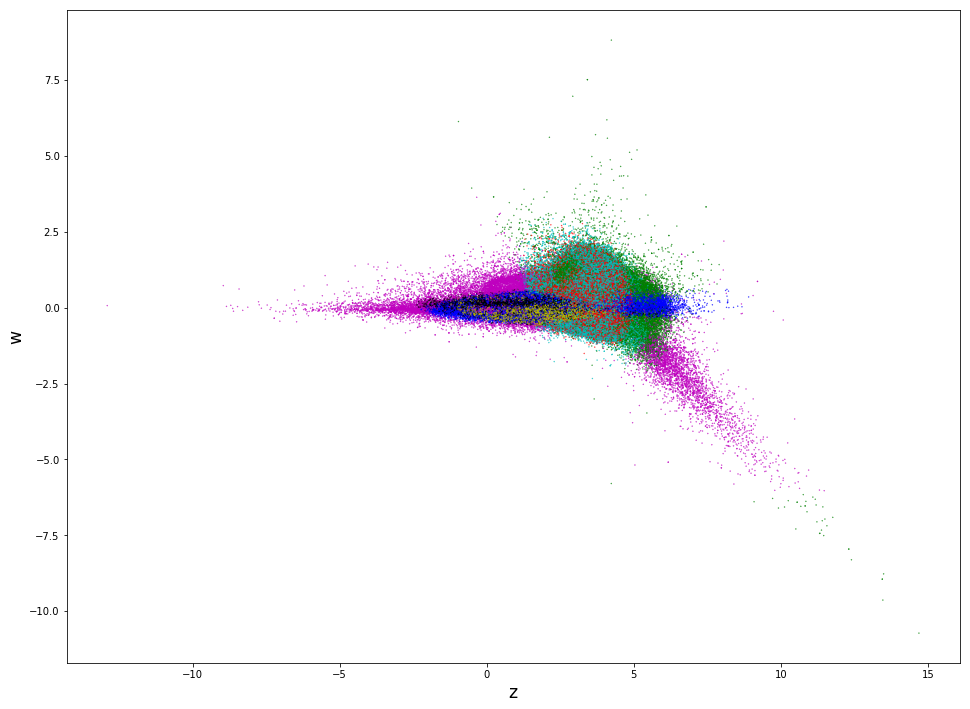

In [19]:
plot_2d_scatterplot(x_axis="z", y_axis="w")